# Spring 2020 CS4641 Project


### Environment Setup

In [3]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_pickle('dataframe_with_vector_compressed.pkl', compression='zip')

MemoryError: 

In [7]:
df.head(10)

,track_id,artist_name,duration,loudness,tempo,title,year,lyrics,tags,lyrics_vector
0,TRMMMKI128F931D80D,Lena Philipsson,262.26893,-3.925,122.332,006,1998,"1:23,2:5,3:13,4:10,5:4,6:9,7:1,8:4,9:4,10:1,11...","[[swedish, 100], [pop, 100]]","[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ..."
1,TRMMMUT128F42646E8,Shawn Colvin,216.47628,-14.379,99.214,(Looking For) The Heart Of Saturday,1994,"2:36,3:25,4:2,5:8,6:2,7:1,8:6,10:8,12:5,13:19,...","[[cover, 100]]","[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ..."
2,TRMMMQY128F92F0EA3,Dying Fetus,196.02240,-6.366,189.346,Ethos of Coercion,2009,"2:10,3:1,4:2,5:1,9:1,10:1,13:9,14:2,18:1,21:1,...","[[Technical Death Metal, 100], [Brutal Death M...","[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,..."
3,TRMMMTK128F424EF7C,Emery,217.57342,-4.867,88.423,Rock-N-Rule,2007,"1:20,2:8,3:15,4:4,5:5,6:6,7:2,8:9,9:12,10:2,11...","[[post-hardcore, 100], [emo, 75], [rock, 50], ...","[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ..."
4,TRMMMQV12903CA201E,Rev. Timothy Wright,353.77587,-7.569,167.850,I Made It Over,0,"1:24,2:1,3:15,4:4,5:4,7:4,8:12,11:2,35:4,40:2,...","[[THE WRIGHT WAY, 100]]","[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ..."
5,TRMMMNO128F93539AA,Martin Sexton,319.81669,-7.185,187.378,In The Journey,2001,"1:30,2:15,3:4,4:6,5:15,6:5,7:3,8:13,9:11,10:6,...","[[singer-songwriter, 100], [rock, 66], [jazz, ...","[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2..."
6,TRMMMPJ128F9306985,Christian Castro,258.89914,-4.660,157.862,Tu Vida Con La Mía,0,"6:1,7:2,38:11,42:5,47:3,77:15,90:6,102:5,104:4...","[[cristian castro, 100], [azul, 100], [Roma, 5...","[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,TRMMMRZ128F4265EB4,Aerosmith,253.70077,-3.278,67.060,I'm Ready,2004,"1:23,2:1,3:13,4:2,5:2,6:5,7:4,8:2,9:2,12:1,13:...","[[classic rock, 100], [rock, 83], [hard rock, ...","[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0..."
8,TRMMMKQ128F92EBCB5,Kreator,372.42730,-6.663,191.665,All of the same blood,2001,"2:12,3:2,4:3,5:4,10:2,12:1,13:9,15:2,17:1,21:2...","[[thrash metal, 100], [metal, 32], [thrash, 23...","[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,..."
9,TRMMMBU128F9305AC3,The Maytals,175.20281,-9.049,156.753,Night And Day,1994,"1:6,2:4,3:4,4:2,5:7,10:1,11:5,13:1,21:2,27:1,2...","[[reggae, 100], [rocksteady, 75], [EARLY REGGA...","[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ..."


# Year Analysis
Claudia 3/23/2020

In [53]:
df['year'].describe()
# boxplot = df.boxplot(column=['year'])

count    237662.000000
mean       1473.147659
std         879.327036
min           0.000000
25%           0.000000
50%        1996.000000
75%        2004.000000
max        2010.000000
Name: year, dtype: float64

In [9]:
def bin_year(row):
    year = row['year']
    decade = int(np.floor(year / 10) * 10)
    return decade

df['year_decade'] = df.apply(bin_year, axis=1)
df.head()

,track_id,artist_name,duration,loudness,tempo,title,year,lyrics,tags,lyrics_vector,year_decade
0,TRMMMKI128F931D80D,Lena Philipsson,262.26893,-3.925,122.332,006,1998,"1:23,2:5,3:13,4:10,5:4,6:9,7:1,8:4,9:4,10:1,11...","[[swedish, 100], [pop, 100]]","[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",1990
1,TRMMMUT128F42646E8,Shawn Colvin,216.47628,-14.379,99.214,(Looking For) The Heart Of Saturday,1994,"2:36,3:25,4:2,5:8,6:2,7:1,8:6,10:8,12:5,13:19,...","[[cover, 100]]","[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",1990
2,TRMMMQY128F92F0EA3,Dying Fetus,196.02240,-6.366,189.346,Ethos of Coercion,2009,"2:10,3:1,4:2,5:1,9:1,10:1,13:9,14:2,18:1,21:1,...","[[Technical Death Metal, 100], [Brutal Death M...","[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",2000
3,TRMMMTK128F424EF7C,Emery,217.57342,-4.867,88.423,Rock-N-Rule,2007,"1:20,2:8,3:15,4:4,5:5,6:6,7:2,8:9,9:12,10:2,11...","[[post-hardcore, 100], [emo, 75], [rock, 50], ...","[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",2000
4,TRMMMQV12903CA201E,Rev. Timothy Wright,353.77587,-7.569,167.850,I Made It Over,0,"1:24,2:1,3:15,4:4,5:4,7:4,8:12,11:2,35:4,40:2,...","[[THE WRIGHT WAY, 100]]","[0, 24, 1, 15, 4, 4, 0, 4, 12, 0, 0, 2, 0, 0, ...",0


In [10]:
df_year = df
df_year = df_year.drop('artist_name', axis = 1)
df_year = df_year.drop('duration', axis = 1)
df_year = df_year.drop('lyrics', axis = 1)
df_year = df_year.drop('tempo', axis = 1)
df_year = df_year.drop('loudness', axis = 1)
df_year = df_year.drop('title', axis = 1)
df_year = df_year.drop('year', axis = 1)
df_year = df_year.drop('tags', axis = 1)

df_year = df_year.replace(0, np.nan)
df_year = df_year.dropna(how='any', axis=0)
df_year.head(10)

,track_id,lyrics_vector,year_decade
0,TRMMMKI128F931D80D,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",1990.0
1,TRMMMUT128F42646E8,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",1990.0
2,TRMMMQY128F92F0EA3,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",2000.0
3,TRMMMTK128F424EF7C,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",2000.0
5,TRMMMNO128F93539AA,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",2000.0
7,TRMMMRZ128F4265EB4,"[0, 23, 1, 13, 2, 2, 5, 4, 2, 2, 0, 0, 1, 1, 0...",2000.0
8,TRMMMKQ128F92EBCB5,"[0, 0, 12, 2, 3, 4, 0, 0, 0, 0, 2, 0, 1, 9, 0,...",2000.0
9,TRMMMBU128F9305AC3,"[0, 6, 4, 4, 2, 7, 0, 0, 0, 0, 1, 5, 0, 1, 0, ...",1990.0
10,TRMMMFJ128F92E15AC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, ...",2000.0
11,TRMMMFG128F425087B,"[0, 8, 6, 22, 4, 0, 3, 12, 1, 1, 2, 11, 2, 3, ...",2000.0


In [54]:
df_year['year_decade'].describe()

count    175234.000000
mean       1993.030805
std          10.378616
min        1920.000000
25%        1990.000000
50%        2000.000000
75%        2000.000000
max        2010.000000
Name: year_decade, dtype: float64

In [11]:
# Get data to plot
X_year = np.array(df_year["lyrics_vector"].values.tolist())
print(X_year)
print(X_year.shape)

y_year = np.array(df_year["year_decade"])
print(y_year[:20])

[[ 0 23  5 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  8  6 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]]
(175234, 5001)
[1990. 1990. 2000. 2000. 2000. 2000. 2000. 1990. 2000. 2000. 2000. 2000.
 1970. 2000. 2010. 2000. 2000. 2000. 2000. 2000.]


In [13]:
# Apply PCA
print("Starting PCA Decomposition ...")
pca = decomposition.TruncatedSVD(n_components=3)
print("Fitting Data ...")
pca.fit(X_year)
print("Transforming X ...")
X_year_transform = pca.transform(X_year)
print(X_year_transform.shape)

Starting PCA Decomposition ...
Fitting Data ...
Transforming X ...
(175234, 3)


In [15]:
# Plot PCA
df_year['pca_1'] = X_year_transform[:,0]
df_year['pca_2'] = X_year_transform[:,1]
df_year['pca_3'] = X_year_transform[:,2]

pd.DataFrame(X_year_transform).to_pickle("pca_year.pkl")

df_year.head()

,track_id,lyrics_vector,year_decade,pca_1,pca_2,pca_3
0,TRMMMKI128F931D80D,"[0, 23, 5, 13, 10, 4, 9, 1, 4, 4, 1, 2, 2, 2, ...",1990.0,30.723007,-9.311274,6.357756
1,TRMMMUT128F42646E8,"[0, 0, 36, 25, 2, 8, 2, 1, 6, 0, 8, 0, 5, 19, ...",1990.0,38.052834,21.547520,-22.597534
2,TRMMMQY128F92F0EA3,"[0, 0, 10, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 9, 2,...",2000.0,7.340893,8.449396,-1.640509
3,TRMMMTK128F424EF7C,"[0, 20, 8, 15, 4, 5, 6, 2, 9, 12, 2, 2, 7, 1, ...",2000.0,31.726309,-7.335354,0.755450
5,TRMMMNO128F93539AA,"[0, 30, 15, 4, 6, 15, 5, 3, 13, 11, 6, 5, 2, 2...",2000.0,42.800372,0.866144,14.017745


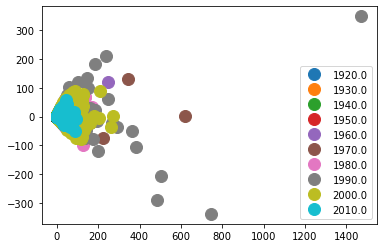

In [57]:
groups = df_year.groupby('year_decade')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.pca_1, group.pca_2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

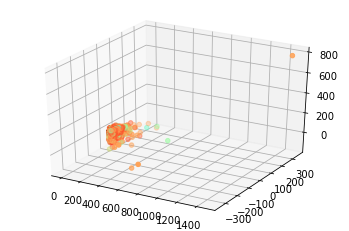

In [61]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_year_transform[:,0], X_year_transform[:,1], X_year_transform[:,2], c=y_year,cmap='rainbow')

plt.show()

### Analyze how many PC's we need

# Linear Regression

In [68]:
# Create training and test sets

def create_train_test_sets(X_data, y_data, percent_train):
    test_percent = 1 - percent_train
    
    train_idx = int(train_percent * N)

    X_train = X_data[:train_idx,:]
    y_train = y_data[:train_idx]

    X_test = X_data[train_idx:,:]
    y_test = y_data[train_idx:]
    
    return X_train,y_train,X_test, y_test

def year_accuracy(y_pred, y_truth):
    y_pred_round = np.around(y_pred, -1) # optional?
    are_correct = y_pred_round == y_truth
    error = np.sum(are_correct) / float(are_correct.shape[0])
    return error

## PCA Linear Regression

In [26]:
from sklearn import linear_model

In [22]:
X_pca_year = pd.read_pickle("pca_year.pkl").to_numpy()
N,K = X_pca_year.shape # N datapoints, K PC's
print(X_pca_year.shape)

(175234, 3)


In [61]:
train_percent = 0.9
y_year = np.array(df_year["year_decade"])

X_train, y_train, X_test, y_test = create_train_test_sets(X_pca_year, y_year, train_percent)

In [62]:
# Running linear Regression

reg = linear_model.LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)
print(y_predict)

[1992.99427497 1993.06464875 1992.87312522 ... 1992.79526469 1992.9742187
 1993.0261776 ]


In [59]:
# Accuracy by raw prediction
error = np.sum(np.power(y_predict - y_test, 2)) 
print("Least squares error: %.4f" % error)

Least squares error: 1880935.1713


In [60]:
# Classification accuracy

y_predict_decade = np.around(y_predict, -1)
print(np.unique(y_predict_decade)) # appears to just pick in the middle
print(np.unique(y_test))
are_correct = y_predict_decade == y_test
error = np.sum(are_correct) / float(are_correct.shape[0])
print(error)

[1990. 2000.]
[1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010.]
0.25131248573385073


With linear regression, we only got 25% accuracy. The linear regression model ends up evaluating to only predict 1990 or 2000. This is not completely surprising, as least 50% of the data with decades information falls in the 1990s - 2000 range. So linear regression just picked a line that reflected the "weighted average" of the years it could pick from. So in this case, just knowing what the distribution of the years provided better information to predict in a linear regression model.

Next we need to try this analysis with more PC's and on the raw data

In [69]:
ridge = linear_model.Ridge(alpha=1.0).fit(X_train, y_train)
y_ridge_predict = ridge.predict(X_test)
print(y_ridge_predict)

ridge_error = year_accuracy(y_ridge_predict, y_test)
print(ridge_error)

[1987.61861915 1991.96628781 1993.9752109  ... 1991.46502923 1988.32213632
 2004.99978384]
0.39677014380278475


In [70]:
lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
y_lasso_predict = lasso.predict(X_test)
print(y_lasso_predict)

lasso_error = year_accuracy(y_lasso_predict, y_test)
print(lasso_error)

[1991.72052046 1986.96036919 1992.21811488 ... 1992.72746218 1991.17069835
 1993.01511318]
0.32361333028988815


## Linear Regression on Raw Data

In [65]:
# X_year = np.array(df_year["lyrics_vector"].values.tolist())

N,D = X_lyrics.shape

y_year = np.array(df_year["year_decade"])

X_train,y_train,X_test, y_test = create_train_test_sets(X_lyrics, y_year, percent_train=0.9)

In [66]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)
print(y_predict)

[1987.61868683 1991.97096032 1993.97515829 ... 1991.46483881 1988.322108
 2005.00820024]


In [67]:
# Classification accuracy

y_predict_decade = np.around(y_predict, -1)
print(np.unique(y_predict_decade)) # appears to just pick in the middle
print(np.unique(y_test))
are_correct = y_predict_decade == y_test
error = np.sum(are_correct) / float(are_correct.shape[0])
print(error)

[1930. 1960. 1970. 1980. 1990. 2000. 2010. 2020. 2030.]
[1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990. 2000. 2010.]
0.39677014380278475


In [ ]:
# Try Lasso for sparse coefficients
# try ridge regression?

# show the coefficients from the linear model: determine which words are informative